In [99]:
import pandas as pd
import numpy as np
import requests as r
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import time

In [101]:
df_walmart= pd.DataFrame()
url1 ="""https://www.walmart.com/cp/api/get-deals-list?prg=desktop&dealsId=electronics&ps=60&page="""
url2 ="""&shelf_id=5788839&shelfType=manual"""

headers="""accept: application/json
cid: undefined
content-type: application/json
Referer: https://www.walmart.com/m/electronics?page=2&ps=60
sec-ch-ua: " Not A;Brand";v="99", "Chromium";v="90", "Google Chrome";v="90"
sec-ch-ua-mobile: ?0
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36
useragent: undefined"""
headers = dict([i.split(': ') for i in headers.split('\n')])


for i in range(1,15):
    url = url1+f'{i}'+url2
    response = r.get(url, headers = headers)
    data=response.json()
    data= pd.json_normalize(data['items'])
    df_walmart = df_walmart.append(data)
    time.sleep(5) #3 seconds\
    

In [43]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [102]:
# save org df to csv file
df_walmart.reset_index(drop=True, inplace=True)
df_walmart.to_csv('.\output\org_walmart.csv', index=False)

In [103]:
df_walmart.shape

(840, 92)

In [145]:
# make a copy of org df to have a df to work with. 
df = df_walmart.copy()
df.shape

(840, 92)

In [146]:
# Drop the Columns we dont need and reorder the columns the way we want. 
df.drop(columns = ['usItemId', 'shippingPassEligible', 'wfsEnabled', 'pickupDiscountEligible', 'preOrderAvailable', 'virtualPack', 'premiumBrand', 'is_limited_qty', 'isLimitedQuantity','visibleSwatches','primaryOffer.offerId', 'fulfillment.isS2H', 'fulfillment.isS2S','fulfillment.isSOI', 'fulfillment.isPUT', 'fulfillment.s2SDisplayFlags','ppu.unit', 'ppu.amount', 'ppu.currencyCode','mediaLanguage', 'sellerBadge','variants.variantMeta', 'variants.variantData', 'isbn', 'mediaFormat','primaryOffer.minPrice', 'primaryOffer.maxPrice','primaryOffer.showMinMaxPrice', 'preOrderAvailableDate', 'launchDate','submapType', 'bundleType', 'primaryOffer.installmentFrequency','primaryOffer.durationWithInterest.duration','primaryOffer.durationWithInterest.durationUOM','primaryOffer.durationWithInterest.interest','primaryOffer.durationWithInterest.interestUOM','inventory.displayFlags', 'fulfillment.thresholdAmount','fulfillment.thresholdCurrencyCode', 'mediaRating','primaryOffer.unitPriceDisplayCondition', 'consoleKstem','minItemCountPerOrder', 'mediaRunningTime','geoItemClassification', 'giftingEligible', 'pcsType','wmtgPricePerUnitQuantity',  'isHeartable','countPerPack', 'isWMPlusShipping', 'blitzItem', 'marketPlaceItem','twoDayShippingEligible', 'specialOfferBadge', 'specialOfferText','specialOfferLink', 'sellerId', 'sellerName', 'enableAddToCart','canAddToCart', 'cta', 'showPriceAsAvailable', 'itemClassId', 'primaryOffer.currencyCode', 'primaryOffer.showWasPrice', 'inventory.availableOnline', 'productPageUrl', 'fulfillment.s2HDisplayFlags', 'productType', 'imageProps.src', 'imageProps.srcSet', 'seeAllLink', 'department','seeAllName'], inplace=True)
df = df.loc[:, ['productId', 'primaryOffer.savingsAmount', 'primaryOffer.offerPrice', 'primaryOffer.listPrice', 'title', 'description', 'productCategory', 'customerRating', 'numReviews', 'brand', 'initialQuantity', 'quantity','standardUpc','imageUrl']]

In [131]:
df

,productId,primaryOffer.savingsAmount,primaryOffer.offerPrice,primaryOffer.listPrice,title,description,productCategory,customerRating,numReviews,brand,initialQuantity,quantity,standardUpc,imageUrl
0,3JMS5HDQJKWL,22.00,197.00,219.00,Apple AirPods Pro,<li>Active Noise Cancellation for immersive so...,Headphones,4.600,5670.0,[Apple],46346,46346,[00190199246850],https://i5.walmartimages.com/asr/c67bebef-646f...
1,530DS38JD2CB,NaN,597.99,NaN,"SAMSUNG 65"" Class 4K Crystal UHD (2160P) LED S...",<li>Samsung 65-inch Class Crystal UHD TU-7000 ...,Televisions,4.400,6609.0,[Samsung],49,49,[00887276400068],https://i5.walmartimages.com/asr/ded72051-ba21...
2,7GPRRVEITAG5,40.00,249.00,289.00,"HP 14"" Pentium 4GB/64GB Chromebook, 14"" HD Dis...",Chrome with integrated Intel UHD Graphics 600 ...,Laptop Computers,4.200,357.0,[HP],13365,13365,[00194721548283],https://i5.walmartimages.com/asr/617aef72-8c6d...
3,2RRKOAAOOFW4,30.00,169.00,199.00,Apple Watch Series 3 GPS - 38mm - Sport Band -...,<li>Elevated in every way.</li><li>Space Gray ...,Smart Watches,4.600,4766.0,[Apple],10107,10107,[00190198806116],https://i5.walmartimages.com/asr/83ed7cf5-45b5...
4,61MH2ASN39UV,NaN,299.00,NaN,Apple 10.2-inch iPad (Latest Model) Wi-Fi 32GB,Apple Ipad Wi-fi 32gb Space Gray-usa,Tablet Computers,4.800,2075.0,[Apple],9520,9520,[00190199807075],https://i5.walmartimages.com/asr/6d240791-e2e8...
5,4Y0RX4OF7XHK,NaN,128.98,NaN,Apple AirPods with Charging Case (Latest Model),"<li><font color=""#323e4f"" face=""times new roma...",Headphones,4.700,8420.0,[Apple],57895,57895,[00190199098428],https://i5.walmartimages.com/asr/ac793ff4-d3da...
6,23LC6PQMT7UF,NaN,193.99,NaN,"SAMSUNG Chromebook 4 11.6"" Intel Celeron Proce...","<li>Compact, light design with 11.6"" display</...",Laptop Computers,4.200,563.0,[Samsung],9451,9451,[00887276371399],https://i5.walmartimages.com/asr/b62d59a5-d7c6...
7,2MJRWZI33VET,NaN,516.00,NaN,"LG 65"" Class 4K UHD 2160P Smart TV 65UN6950ZUA...","<li style=""margin: 0px 0px 0px 4px; line-heigh...",Televisions,4.300,3240.0,[LG],1543,1543,[00719192638563],https://i5.walmartimages.com/asr/ecda5d36-c753...
8,5SS9U66J2V2Q,NaN,223.98,NaN,Acer Chromebook Spin 311 CP311-3H-K3WL Convert...,<li>Touch Experience - Watch what you love in ...,Laptop Computers,4.600,170.0,[Acer],9780,9780,[00195133068819],https://i5.walmartimages.com/asr/142d29c4-fb7e...
9,1F58BAASE008,30.00,199.00,229.00,Apple Watch Series 3 GPS - 42mm - Sport Band -...,<li>GPS and a barometric altimeter track how f...,Smart Watches,4.700,1570.0,[Apple],18991,18991,[00190198806925],https://i5.walmartimages.com/asr/64985038-90f0...


In [147]:
#Check with columns have null values to inspect
df.columns[df.isnull().sum()>0]

Index(['primaryOffer.savingsAmount', 'primaryOffer.offerPrice',
       'primaryOffer.listPrice', 'description', 'customerRating', 'numReviews',
       'brand'],
      dtype='object')

In [148]:
# Check how many null values those columns have 
null_cols = df.isnull().sum()
null_cols

productId                       0
primaryOffer.savingsAmount    564
primaryOffer.offerPrice        87
primaryOffer.listPrice        554
title                           0
description                     7
productCategory                 0
customerRating                  4
numReviews                      3
brand                           8
initialQuantity                 0
quantity                        0
standardUpc                     0
imageUrl                        0
dtype: int64

In [149]:
df[['customerRating', 'numReviews']] = df[['customerRating', 'numReviews']].fillna(0)

In [150]:
null_cols = df.isnull().sum()
null_cols

productId                       0
primaryOffer.savingsAmount    564
primaryOffer.offerPrice        87
primaryOffer.listPrice        554
title                           0
description                     7
productCategory                 0
customerRating                  0
numReviews                      0
brand                           8
initialQuantity                 0
quantity                        0
standardUpc                     0
imageUrl                        0
dtype: int64

In [129]:
# Index 517, 748, 751, 752, 755, 758, 764 did not have 'brand' value.
# These items did not have 'savings' as well so we can drop them. 
df.iloc[764]

productId                                                          1NEHN4L9AW50
primaryOffer.savingsAmount                                                  NaN
primaryOffer.offerPrice                                                    8.04
primaryOffer.listPrice                                                      NaN
title                                             Must-Have Back To School Tech
description                          Be back-to-school ready with SanDisk & WD.
productCategory                                                     Hard Drives
customerRating                                                              4.4
numReviews                                                                  185
brand                                                                       NaN
initialQuantity                                                            9999
quantity                                                                   9999
standardUpc                             

In [151]:
# clean the description column to have more readable descriptions. 
df['description'] = df['description'].str.replace('(<li>)', '').str.replace('(</li>)', '').str.replace('<sup>','').str.replace('</sup>','').str.replace('<b>','').str.replace('</b>','').str.replace('<div>','').str.replace('</div>','').str.replace('<p>','').str.replace('</p>','').str.replace('p class="msonormal">', '')
df['description']= df['description'].str.replace('(<.*>)', '')
df['description']=df['description'].fillna(value='')

cols_rename = {'primaryOffer.savingsAmount': 'Savings$' ,'primaryOffer.offerPrice': 'Sale_price$', 'primaryOffer.listPrice': 'Orig_price$', 'title':'Item'}
df.rename(columns = cols_rename, inplace=True)

In [153]:
df.shape

(840, 14)

In [154]:
# as we only want items with savings and brands with NaN dont have savings we can. 
df.dropna(inplace=True)

In [155]:
df.shape

(276, 14)

In [ ]:
df.to_csv('.\output\walmart.csv', index=False)

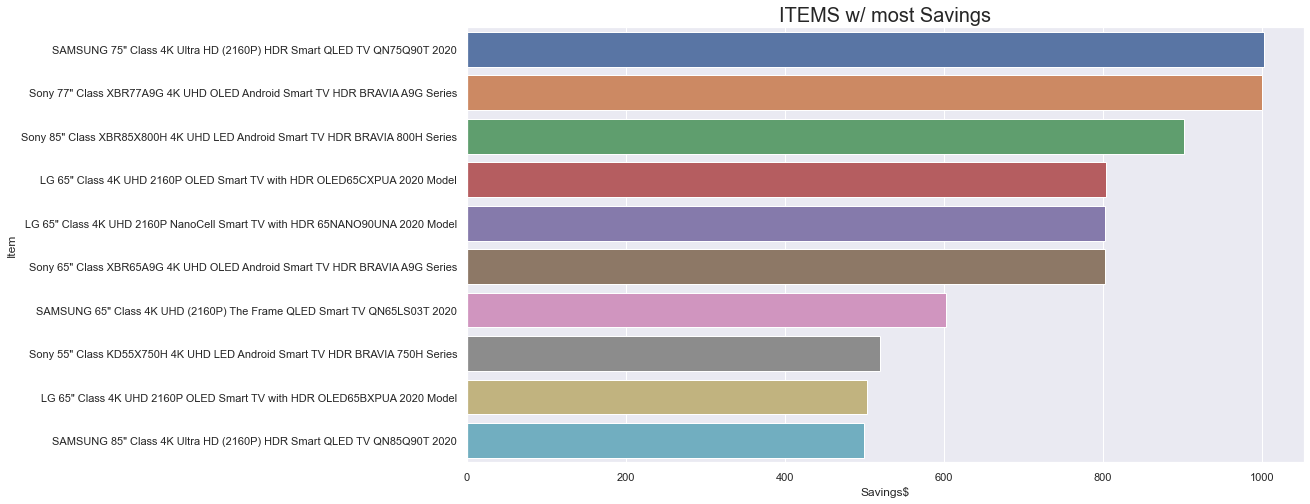

In [330]:
# Item with most savings
item_max_saving = df[["Item", "Savings$"]].sort_values(by = "Savings$", ascending=False)
fig, ax = plt.subplots(figsize = (15,8))
barchart = sns.barplot(data = item_max_saving[1:11], x = 'Savings$', y = "Item")  
plt.title('ITEMS w/ most Savings', fontsize= 20)
fig.savefig('.\output\items_most_savings.png', bbox_inches='tight')

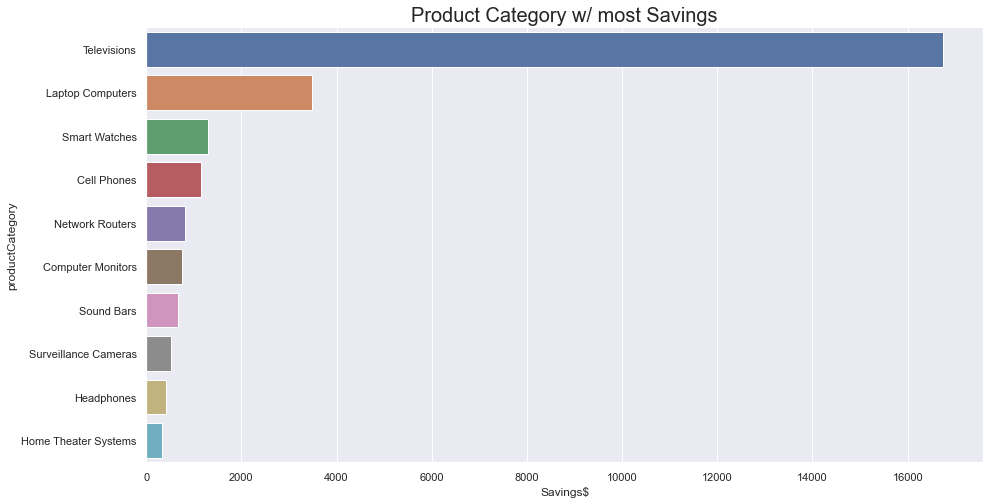

In [327]:
# Max category Savings
max_category_savings = df.groupby('productCategory')['Savings$'].sum().reset_index().sort_values(by='Savings$', ascending=False)[:10]
fig, ax = plt.subplots(figsize = (15,8))
barchart = sns.barplot(data = max_category_savings, x = 'Savings$', y = 'productCategory')    
plt.title('Product Category w/ most Savings', fontsize= 20)
fig.savefig('.\output\Productcategory_most_savings.png', bbox_inches='tight')

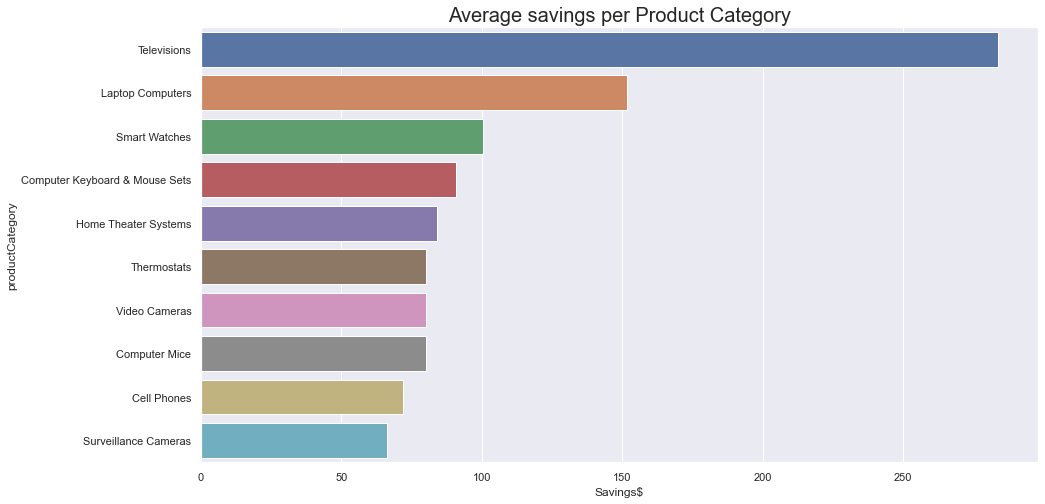

In [328]:
# Avg category Savings
avg_category_savings = df.groupby('productCategory')['Savings$'].mean().reset_index().sort_values(by='Savings$', ascending=False)[:10]
fig, ax = plt.subplots(figsize = (15,8))
barchart = sns.barplot(data = avg_category_savings, x = 'Savings$', y = 'productCategory') 
plt.title('Average savings per Product Category', fontsize= 20)
fig.savefig('.\output\Productcategory_average_savings.png', bbox_inches='tight')

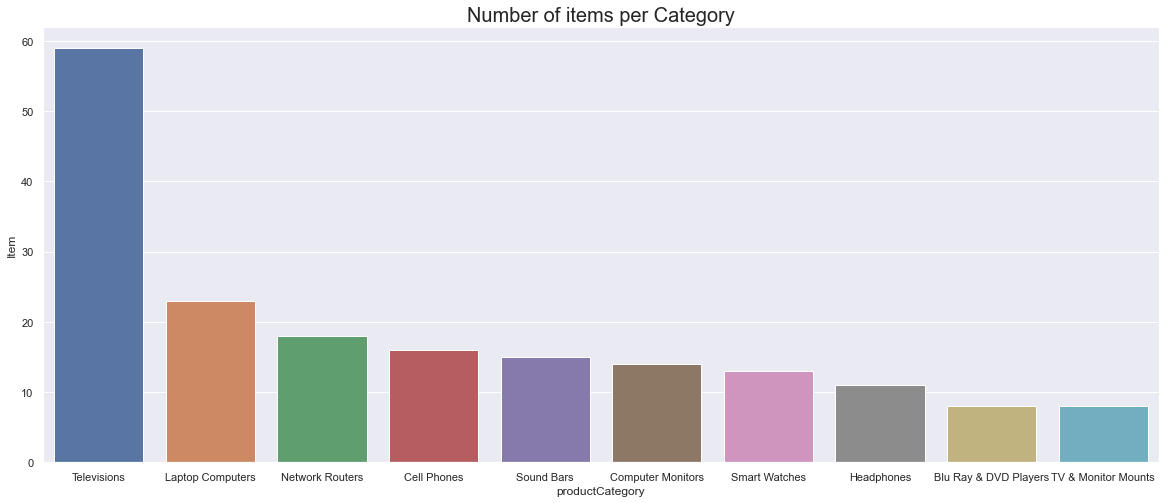

In [329]:
# Items per category
items_per_cat = df.groupby('productCategory')['Item'].count().reset_index().sort_values(by='Item', ascending=False)[:10]
fig, ax = plt.subplots(figsize = (20,8))
barchart = sns.barplot(data = items_per_cat, x = 'productCategory', y = 'Item') 
plt.title('Number of items per Category', fontsize= 20)
fig.savefig('.\output\Productcategory_average_savings2.png', bbox_inches='tight')

In [159]:
import getpass
import pymysql
from sqlalchemy import create_engine, inspect
import os

In [160]:
username = 'root'
database = 'walmart'
password = getpass.getpass()
server = 'localhost'

········


In [161]:
engine = create_engine(f'mysql+pymysql://{username}:{password}@{server}/{database}')

In [164]:
df.to_sql('walmart', engine, index=False, if_exists='replace')